In [1]:
# Name : Vaibhav Dashrath Lonkar 
# Title : Iris Classification

# Importing necessary libraries

In [43]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from flask import Flask, request, render_template # type: ignore
import joblib 
import pickle

 #  Dataset Preparation

In [44]:
# Loading Datasets dataset
iris = load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [45]:
# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [46]:
# Display the first few rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [47]:
# Basic info
print(df.shape)

(150, 5)


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [49]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# Data Exploration in iris Dataset

In [50]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [51]:
# Map target to species name
df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

# Data Visualizations of iris Datasets


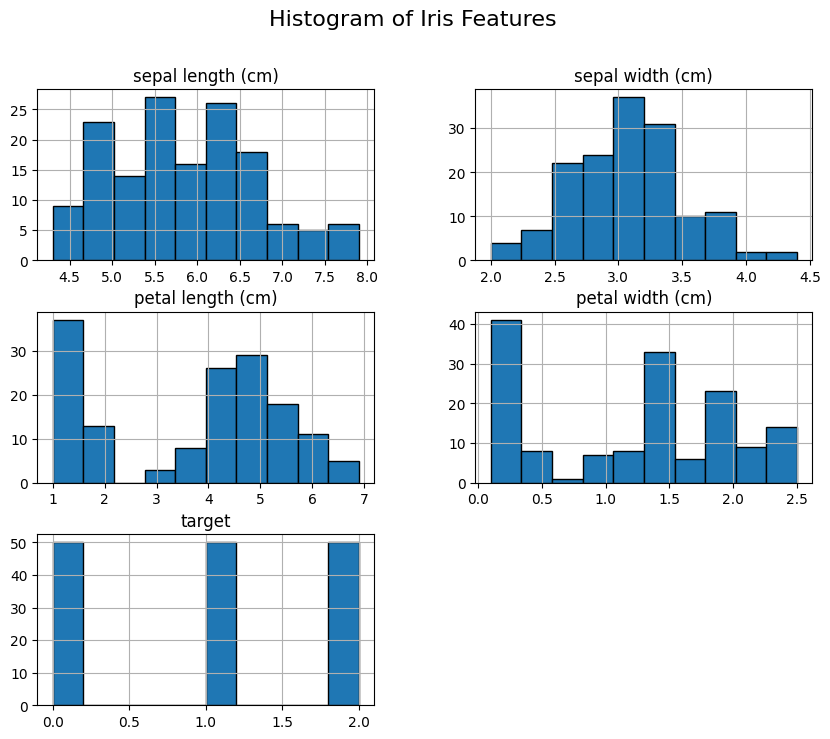

In [52]:
# histogram for Feature Distribution
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histogram of Iris Features", fontsize=16)
plt.show()

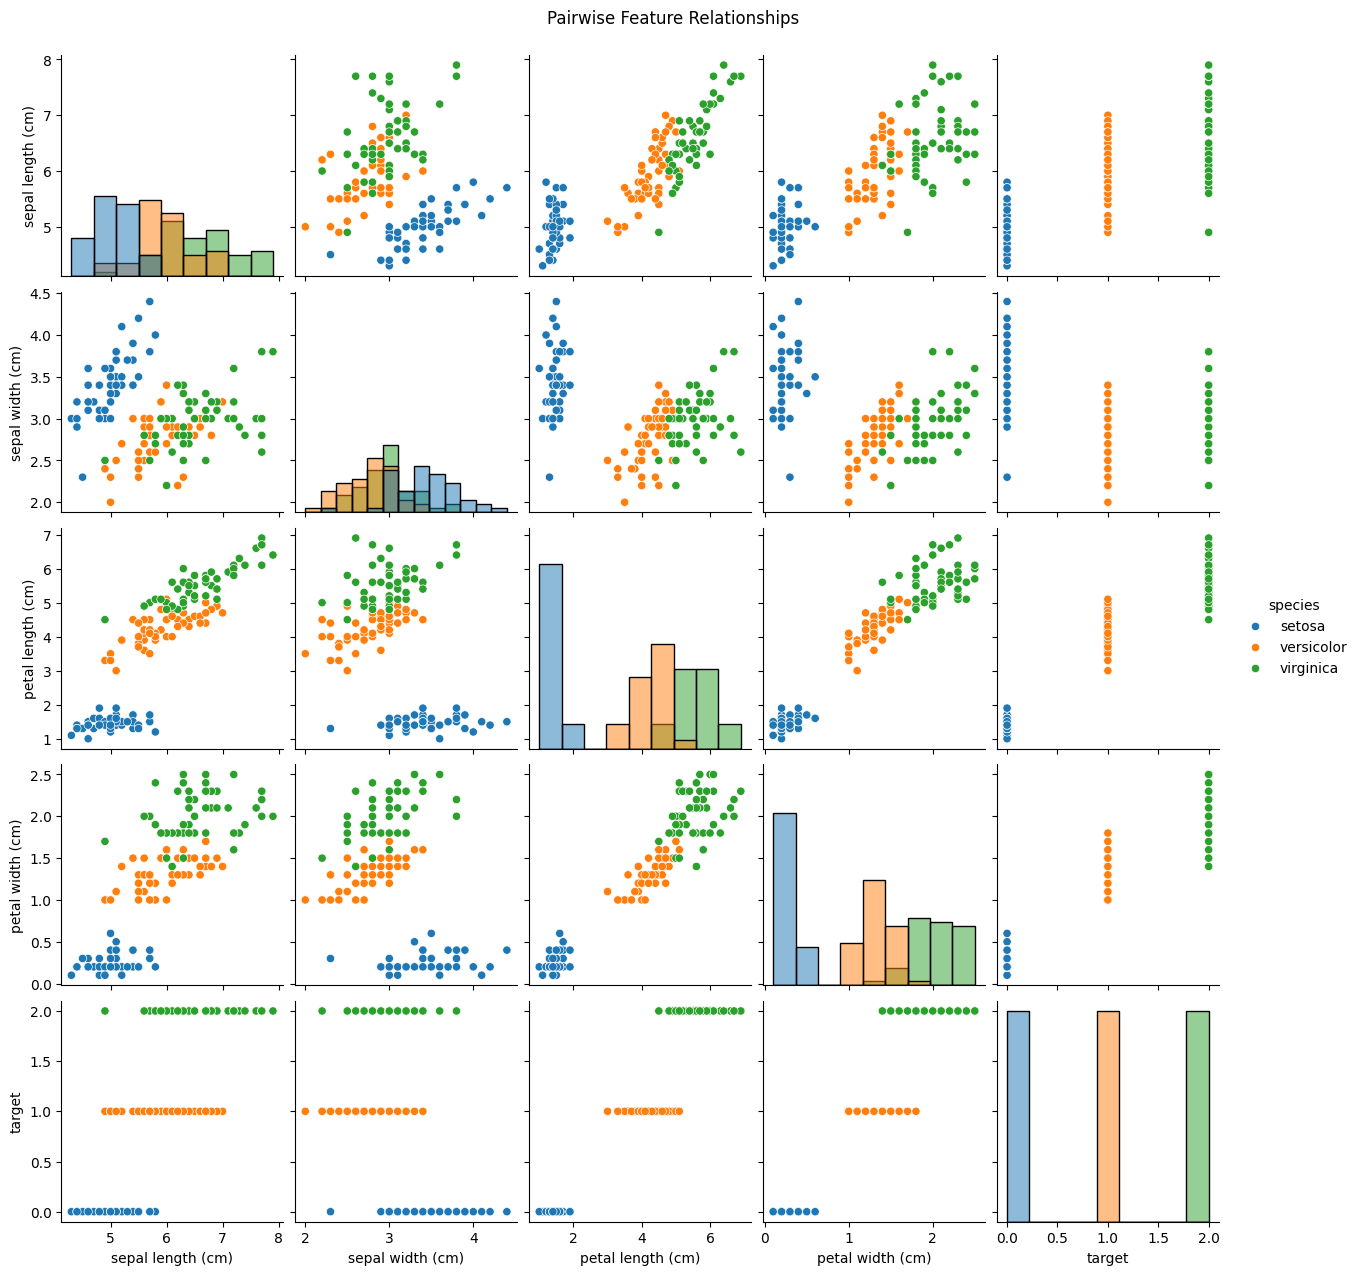

In [53]:
# pairplots 
sns.pairplot(df, hue ="species", diag_kind='hist')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

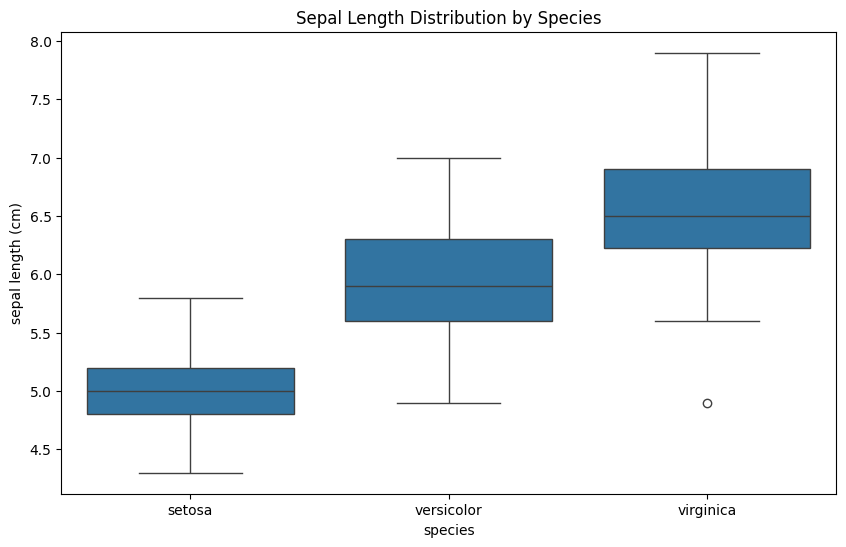

In [54]:
# Denoting Boxplot for Species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.title("Sepal Length Distribution by Species")
plt.show()

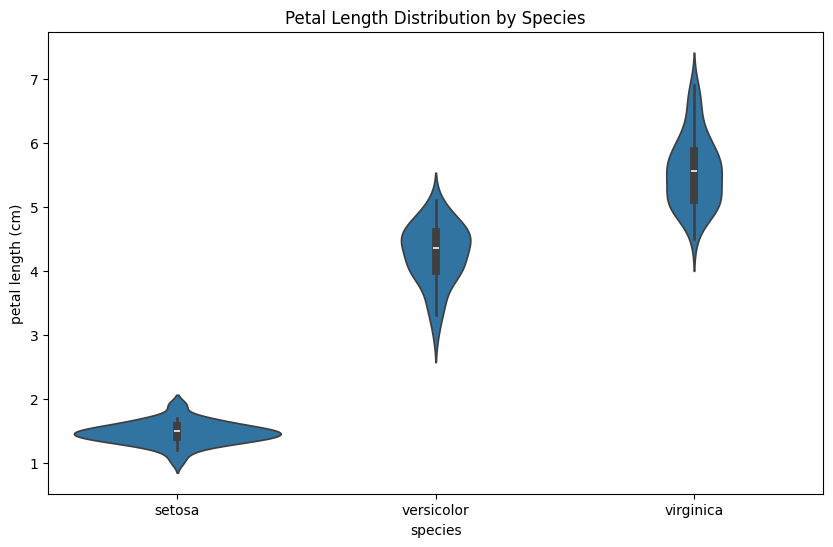

In [55]:
# Violentplot for Distribution insight
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="petal length (cm)", data=df)
plt.title("Petal Length Distribution by Species")
plt.show()

# Data Preprocessing

In [56]:
print(df.duplicated().sum())

# Drop if any
df = df.drop_duplicates()

1


In [57]:
# Encoding Target Variable 
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])  # 0, 1, 2

In [58]:
#  Feature Scaling (Normalization or Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(df[iris.feature_names])

In [59]:
# Normalization (range 0–1) 
scaler = MinMaxScaler()
X = scaler.fit_transform(df[iris.feature_names])

# Split Dataset Into Training and Testing Set

In [60]:

X = df[iris.feature_names]
y = df['target']  # or use df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model selection and training

In [61]:

# Define and Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 1.00


#  Evaluating Best Model

In [62]:
# Evaluate the Best Model 
best_model = KNeighborsClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


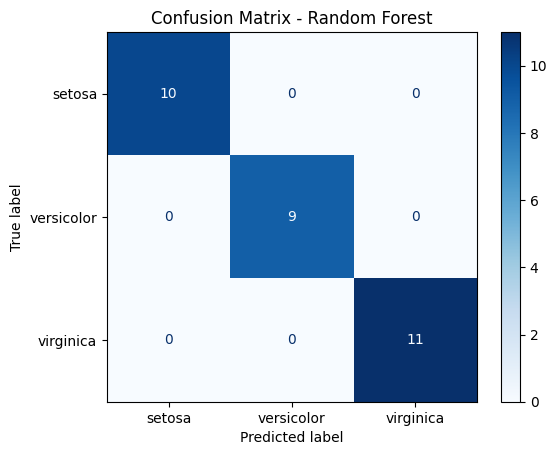

In [63]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=iris.target_names, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Training the Model

In [64]:

# Train
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [65]:
# Predict
y_pred = model.predict(X_test)

In [66]:
# Evaluate Using Metrics
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Classification Report (includes precision, recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


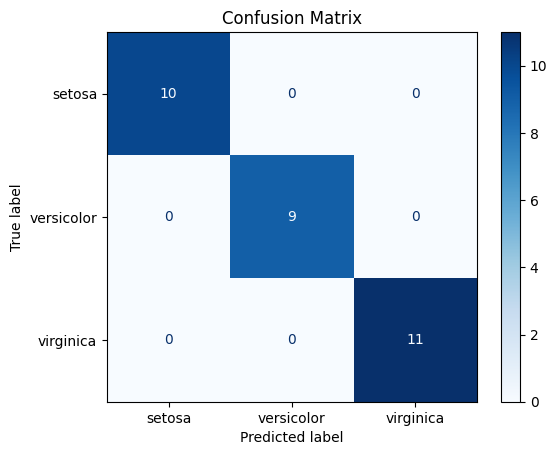

In [67]:
# output of visualization 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning

In [68]:
# Define Hyperparameter Grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#  Set Up GridSearchCV
grid_search = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',         # metric to optimize
    verbose=1,
    n_jobs=-1                   # use all CPU cores
)

In [69]:
# Fit on Training Data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [70]:
# Get the Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9663043478260869


In [71]:
# Evaluate the Tuned Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Model Interpretation and Insights

In [72]:
# Select two features for plotting
X_plot = X_train.iloc[:, [0, 2]].values
y_plot = y_train
# Train model on 2D data
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_plot, y_plot)

KNeighborsClassifier(n_neighbors=7)

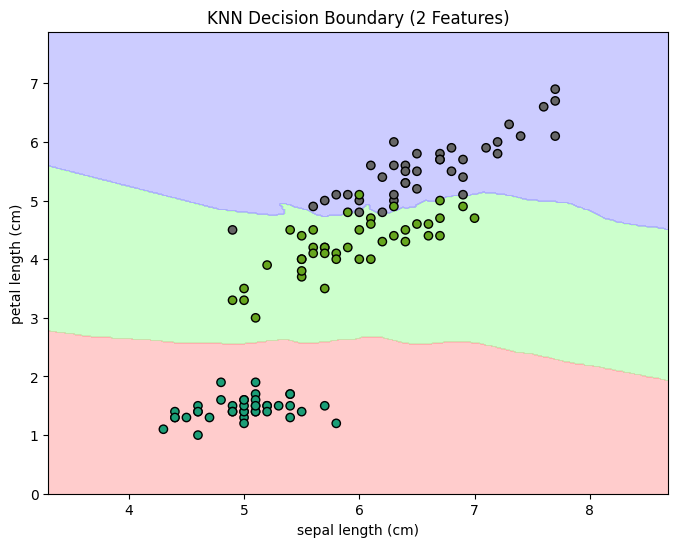

In [73]:
# Create mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', cmap='Dark2')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("KNN Decision Boundary (2 Features)")
plt.show()

In [74]:
# Save best model
best_knn = grid_search.best_estimator_
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)